In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Các thư viện Scikit-learn (sklearn)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor # Dùng cho câu (e)
from sklearn.metrics import mean_squared_error # Dùng cho câu (d)

# Tắt cảnh báo
import warnings
warnings.filterwarnings('ignore')

# --- Tải Dữ liệu ---
file_path = 'real_estate_valuation_data.csv'
df = pd.read_csv(file_path)

# Bỏ cột 'No' vì nó không phải là đặc trưng
df = df.drop('No', axis=1)

print("Tải dữ liệu thành công! (đã bỏ cột 'No')")
print(df.head())

Tải dữ liệu thành công! (đã bỏ cột 'No')
   X1 transaction date  X2 house age  X3 distance to the nearest MRT station  \
0             2012.917          32.0                                84.87882   
1             2012.917          19.5                               306.59470   
2             2013.583          13.3                               561.98450   
3             2013.500          13.3                               561.98450   
4             2012.833           5.0                               390.56840   

   X4 number of convenience stores  X5 latitude  X6 longitude  \
0                               10     24.98298     121.54024   
1                                9     24.98034     121.53951   
2                                5     24.98746     121.54391   
3                                5     24.98746     121.54391   
4                                5     24.97937     121.54245   

   Y house price of unit area  
0                        37.9  
1                      

--- Câu (a): Biểu đồ Tuổi nhà vs. Giá nhà ---


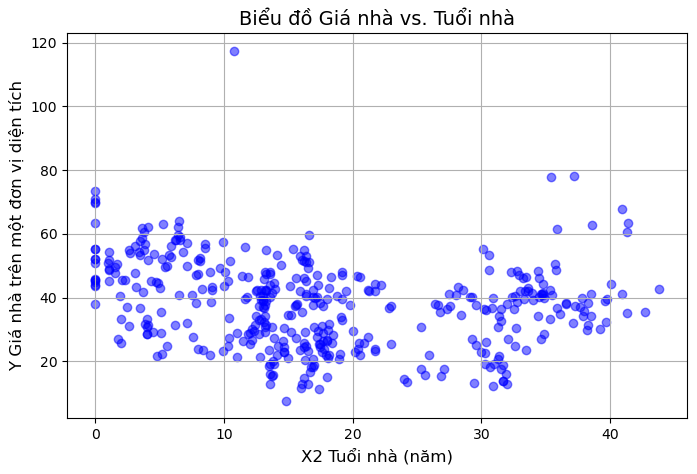

In [7]:
print("--- Câu (a): Biểu đồ Tuổi nhà vs. Giá nhà ---")

# 1. Lấy dữ liệu cho các trục
x_age = df['X2 house age']
y_price = df['Y house price of unit area']

# 2. Vẽ biểu đồ
plt.figure(figsize=(8, 5))
plt.scatter(x_age, y_price, alpha=0.5, color='blue') # alpha=0.5 để nhìn rõ điểm chồng chéo

# 3. Đặt tên cho các trục và tiêu đề
plt.title('Biểu đồ Giá nhà vs. Tuổi nhà', fontsize=14)
plt.xlabel('X2 Tuổi nhà (năm)', fontsize=12)
plt.ylabel('Y Giá nhà trên một đơn vị diện tích', fontsize=12)
plt.grid(True) # Thêm lưới
plt.show()

--- Câu (b): Biểu đồ Giá nhà theo Vị trí (Kinh độ, Vĩ độ) ---


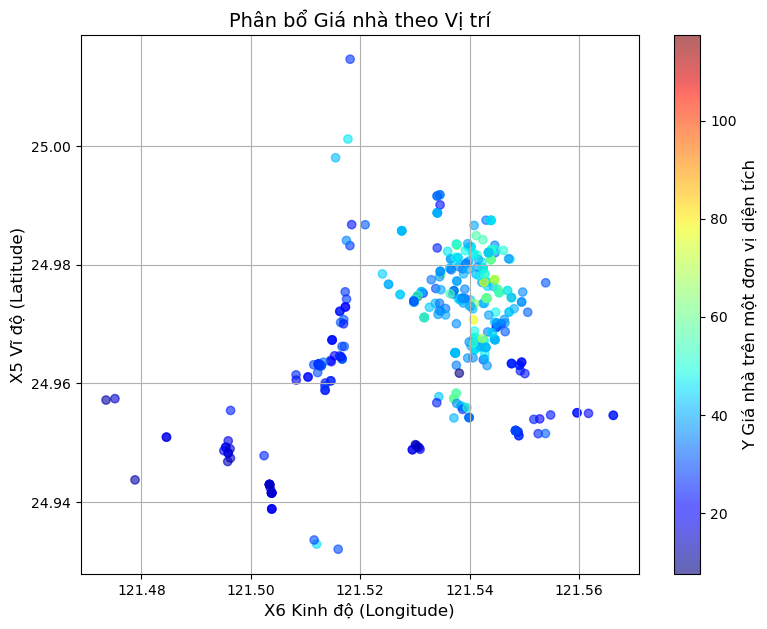

In [9]:
print("--- Câu (b): Biểu đồ Giá nhà theo Vị trí (Kinh độ, Vĩ độ) ---")

# 1. Lấy dữ liệu cho các trục và màu sắc
x_lon = df['X6 longitude']
y_lat = df['X5 latitude']
colors_price = df['Y house price of unit area'] # Dùng giá làm màu

# 2. Vẽ biểu đồ
plt.figure(figsize=(9, 7))
# 'c=colors_price' -> gán giá trị cho màu
# 'cmap='jet'' -> dùng thang màu 'jet' (từ Xanh-Lạnh-Giá thấp đến Đỏ-Nóng-Giá cao)
scatter = plt.scatter(x_lon, y_lat, c=colors_price, cmap='jet', alpha=0.6)

# 3. Thêm thanh màu (colorbar) để chú thích
cbar = plt.colorbar(scatter)
cbar.set_label('Y Giá nhà trên một đơn vị diện tích', fontsize=12)

# 4. Đặt tên cho các trục và tiêu đề
plt.title('Phân bổ Giá nhà theo Vị trí', fontsize=14)
plt.xlabel('X6 Kinh độ (Longitude)', fontsize=12)
plt.ylabel('X5 Vĩ độ (Latitude)', fontsize=12)
plt.grid(True)
plt.show()

In [11]:
print("--- Câu (c): Chia dữ liệu và Huấn luyện Linear Regression ---")

# 1. Tách X (đặc trưng) và y (mục tiêu)
X = df.drop('Y house price of unit area', axis=1)
y = df['Y house price of unit area']

# 2. Chia dữ liệu (80% train, 20% test)
# random_state=42 để đảm bảo kết quả luôn giống nhau mỗi lần chạy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Đã chia dữ liệu: {len(X_train)} mẫu huấn luyện, {len(X_test)} mẫu kiểm thử.")

# 3. Chuẩn hóa dữ liệu
# Đây là bước quan trọng để các đặc trưng "công bằng" với nhau
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Đã chuẩn hóa (scale) dữ liệu X_train và X_test.")

# [cite_start]4. Huấn luyện mô hình Linear Regression [cite: 3223-3243]
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train) # Huấn luyện trên dữ liệu đã chuẩn hóa

print("Đã huấn luyện xong mô hình LinearRegression!")

--- Câu (c): Chia dữ liệu và Huấn luyện Linear Regression ---
Đã chia dữ liệu: 331 mẫu huấn luyện, 83 mẫu kiểm thử.
Đã chuẩn hóa (scale) dữ liệu X_train và X_test.
Đã huấn luyện xong mô hình LinearRegression!


In [13]:
print("--- Câu (d): Đánh giá mô hình bằng MSE ---")

# 1. Dự đoán trên tập kiểm thử
y_pred_lr = model_lr.predict(X_test_scaled)

# [cite_start]2. Tính toán MSE (Mean Squared Error) [cite: 355-359]
mse_lr = mean_squared_error(y_test, y_pred_lr) 
# (Tùy chọn) Tính RMSE (Root MSE) để dễ hiểu hơn
rmse_lr = np.sqrt(mse_lr)

print(f"   Chỉ số MSE (Mean Squared Error): {mse_lr:.4f}")
print(f"   Chỉ số RMSE (Root MSE): {rmse_lr:.4f}")

# 3. Kiểm tra kết quả
if mse_lr < 80:
    print(f"   => Mô hình Linear Regression ĐÃ ĐẠT yêu cầu (MSE < 80)")
else:
    print(f"   => Mô hình Linear Regression CHƯA ĐẠT yêu cầu (MSE < 80)")

--- Câu (d): Đánh giá mô hình bằng MSE ---
   Chỉ số MSE (Mean Squared Error): 53.5056
   Chỉ số RMSE (Root MSE): 7.3148
   => Mô hình Linear Regression ĐÃ ĐẠT yêu cầu (MSE < 80)


In [15]:
print(f"--- Câu (e): Tối ưu mô hình (Mục tiêu: MSE < 80) ---")
print(f"MSE của Linear Regression đã là {mse_lr:.4f} (đã đạt mục tiêu).")
print("Chúng ta sẽ thử tối ưu bằng RandomForestRegressor để xem MSE có thể thấp hơn nữa không.")

# 1. Huấn luyện mô hình RandomForest
# RandomForest không bắt buộc dùng dữ liệu đã chuẩn hóa (scaled)
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train) # Huấn luyện trên X_train GỐC

print("Đã huấn luyện xong mô hình RandomForestRegressor.")

# 2. Đánh giá mô hình RandomForest
y_pred_rf = model_rf.predict(X_test) # Dự đoán trên X_test GỐC
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f"   Chỉ số MSE (Random Forest): {mse_rf:.4f}")
print(f"   Chỉ số RMSE (Random Forest): {rmse_rf:.4f}")

# 3. So sánh
print("\n--- So sánh kết quả ---")
print(f"   MSE (Linear Regression): {mse_lr:.4f}")
print(f"   MSE (Random Forest Tối ưu): {mse_rf:.4f}")

if mse_rf < mse_lr:
    print("   => Tối ưu thành công! RandomForest cho MSE thấp hơn Linear Regression.")
else:
    print("   => Linear Regression vẫn cho kết quả tốt hơn.")

--- Câu (e): Tối ưu mô hình (Mục tiêu: MSE < 80) ---
MSE của Linear Regression đã là 53.5056 (đã đạt mục tiêu).
Chúng ta sẽ thử tối ưu bằng RandomForestRegressor để xem MSE có thể thấp hơn nữa không.
Đã huấn luyện xong mô hình RandomForestRegressor.
   Chỉ số MSE (Random Forest): 32.4111
   Chỉ số RMSE (Random Forest): 5.6931

--- So sánh kết quả ---
   MSE (Linear Regression): 53.5056
   MSE (Random Forest Tối ưu): 32.4111
   => Tối ưu thành công! RandomForest cho MSE thấp hơn Linear Regression.
